<a href="https://www.kaggle.com/code/suyashsunilraomorale/cnn-for-flower-recognition?scriptVersionId=125749261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **FLOWER RECOGNITION**

**ALL THE COMMENTED CODE IS MY OLD VERSION CODE, WHERE I WAS DONG IN DIFFERE WAY**

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from IPython.display import Image, display
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tqdm import tqdm
import cv2
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**displaying flower images from each class**

daisy


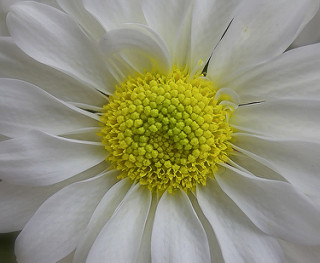



dandelion


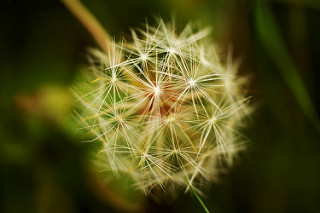



rose


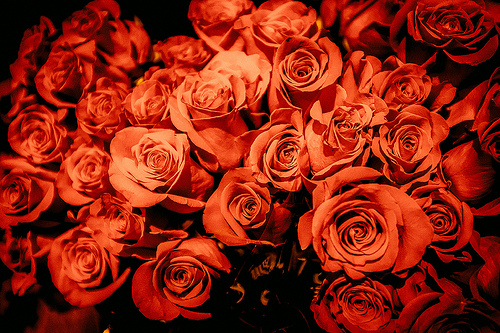



sunflower


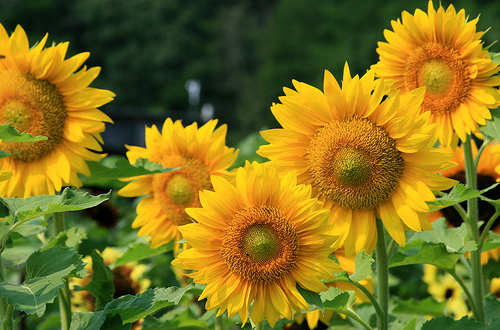



tulip


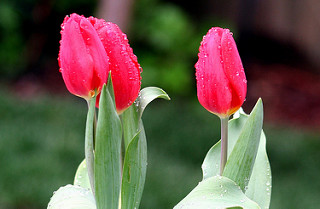

In [2]:
listOfImageNames = ['/kaggle/input/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg',
                    '/kaggle/input/flowers-recognition/flowers/dandelion/10043234166_e6dd915111_n.jpg',
                    '/kaggle/input/flowers-recognition/flowers/rose/10503217854_e66a804309.jpg',
                    '/kaggle/input/flowers-recognition/flowers/sunflower/1008566138_6927679c8a.jpg',
                    '/kaggle/input/flowers-recognition/flowers/tulip/100930342_92e8746431_n.jpg']
labels = ['daisy','dandelion','rose','sunflower','tulip']
for i,imageName in enumerate(listOfImageNames):
    print(labels[i])
    display(Image(filename=imageName))
    print("\n")

# **Splitting the folder into train validate and test folders**

In [3]:
! pip install split-folders

In [4]:
import splitfolders

In [5]:
input_folder = "/kaggle/input/flowers-recognition/flowers"
output = "Output_Folder" 

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.7,0.2,0.1))

Copying files: 4317 files [00:16, 253.96 files/s]


In [6]:
imgss = cv2.imread("/kaggle/input/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg")

In [7]:
imgss.shape

(263, 320, 3)

## **Data Augmentation**

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2
)

validate_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

## **creating a training and testing data**

In [9]:
train_data =  train_datagen.flow_from_directory(
        "/kaggle/working/Output_Folder/train",
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

validate_data = validate_datagen.flow_from_directory(
        "/kaggle/working/Output_Folder/val",
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

test_data =  test_datagen.flow_from_directory(
        "/kaggle/working/Output_Folder/test",
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical')

Found 3019 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
Found 438 images belonging to 5 classes.


**spliting above data into, data and labels**

1. total images in train_data = 3238, batch size = 32, therefore total no. of batches formed are 3238/32 = 101.

2. total images in test_data = 1079, batch size = 32, therefore total no. of batches formed are 1079/32 = 33.

# **Buliding Model**

In [10]:
model = Sequential()

we are using four convolutional layers and four maxpooling layers

In [11]:
model.add(Conv2D(filters=32,activation='relu',kernel_size=5,input_shape=[150,150,3]))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=64,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=96,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Conv2D(filters=96,activation='relu',kernel_size=3))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Flatten())


model.add(Dense(64,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 96)       0

**creating early stopping**

In [12]:
es = EarlyStopping(monitor='val_loss',patience=3,mode='min')

## **Compiling the model**

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**training the model**

In [14]:
model.fit(train_data,verbose=3,validation_data=validate_data,batch_size=64,epochs=50,callbacks=[es])

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50


## **Creating dataframe of losses and accuracies of model**

In [15]:
losses = model.history.history
df_loss = pd.DataFrame(losses)

In [16]:
df_loss.sort_values(by='val_accuracy',ascending=False).head()

,loss,accuracy,val_loss,val_accuracy
18,0.729936,0.729381,0.735953,0.717442
14,0.796247,0.691289,0.776266,0.698837
19,0.720306,0.722425,0.771791,0.694186
16,0.744262,0.712819,0.768128,0.693023
15,0.776898,0.697913,0.788475,0.689535


## **Visualizing the performance of model**

Text(0, 0.5, 'Accuracy')

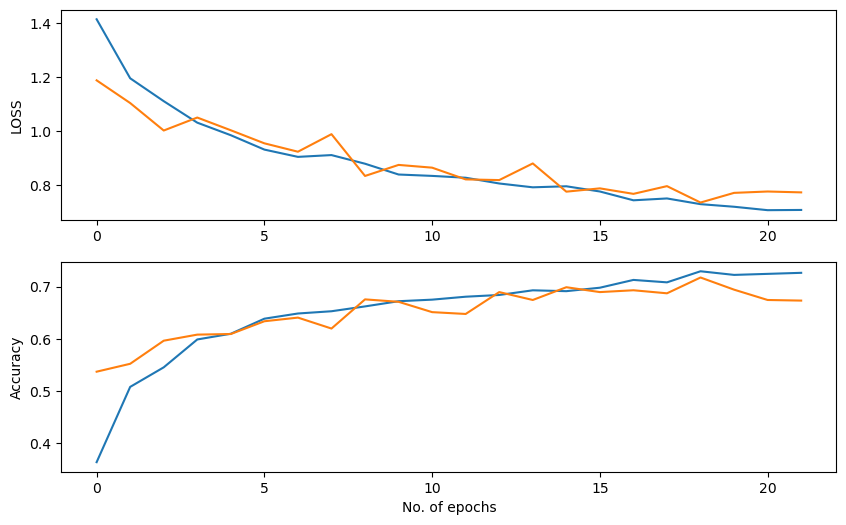

In [17]:
fig,axes = plt.subplots(2,1,figsize=(10,6))
axes[0].plot(df_loss[['loss','val_loss']])
axes[0].set_ylabel("LOSS")

axes[1].plot(df_loss[['accuracy','val_accuracy']])
axes[1].set_xlabel("No. of epochs")
axes[1].set_ylabel("Accuracy")

## **Evaluting the model on test data**

In [18]:
loss, accuracy= model.evaluate(test_data)
print(f'Accuracy: {accuracy*100}')

14/14 [==============================] - 1s 91ms/step - loss: 0.7300 - accuracy: 0.7078
Accuracy: 70.77625393867493


# --------------------------------------------------------

# **USING KERAS TUNER FOR CNN MODEL**

**used for hyperparamenter tuning**

**creating build_model function, hp is hyperparameter**

In [19]:
import tensorflow as tf
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(150, 150, 3)
        ),
        keras.layers.MaxPool2D(
            pool_size=hp.Choice('maxpool_1_kernel', values=[2,3, 5]),
            padding='same'
        ),
        
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
            activation='relu'
        ),
        keras.layers.Dense(5, activation='softmax')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [20]:
tunersearch = RandomSearch(build_model,objective='val_accuracy',max_trials=5)
tunersearch.search(train_data,epochs=5,validation_data=validate_data,callbacks=[es],batch_size=64)

Trial 5 Complete [00h 02m 24s]
val_accuracy: 0.5465116500854492

Best val_accuracy So Far: 0.6290697455406189
Total elapsed time: 00h 12m 00s


In [21]:
best_hps=tunersearch.get_best_hyperparameters(num_trials=1)[0]
model = tunersearch.hypermodel.build(best_hps)
history = model.fit(train_data,validation_data=validate_data, epochs=50)
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch))

Epoch 1/50
95/95 [==============================] - 25s 257ms/step - loss: 1.5380 - accuracy: 0.4256 - val_loss: 1.1258 - val_accuracy: 0.5395
Epoch 2/50
95/95 [==============================] - 24s 256ms/step - loss: 1.1418 - accuracy: 0.5432 - val_loss: 1.1173 - val_accuracy: 0.5663
Epoch 3/50
95/95 [==============================] - 24s 249ms/step - loss: 1.0948 - accuracy: 0.5747 - val_loss: 1.1863 - val_accuracy: 0.5488
Epoch 4/50
95/95 [==============================] - 24s 257ms/step - loss: 1.0353 - accuracy: 0.5932 - val_loss: 1.0530 - val_accuracy: 0.5953
Epoch 5/50
95/95 [==============================] - 24s 256ms/step - loss: 1.0181 - accuracy: 0.5956 - val_loss: 1.0549 - val_accuracy: 0.5791
Epoch 6/50
95/95 [==============================] - 24s 255ms/step - loss: 1.0047 - accuracy: 0.6035 - val_loss: 0.9613 - val_accuracy: 0.6174
Epoch 7/50
95/95 [==============================] - 25s 259ms/step - loss: 0.9611 - accuracy: 0.6274 - val_loss: 1.0300 - val_accuracy: 0.6047

In [22]:
hypermodel = tunersearch.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_data,epochs=best_epoch, validation_data=validate_data)

Epoch 1/49
95/95 [==============================] - 25s 251ms/step - loss: 1.5425 - accuracy: 0.4078 - val_loss: 1.1554 - val_accuracy: 0.5221
Epoch 2/49
95/95 [==============================] - 24s 256ms/step - loss: 1.1675 - accuracy: 0.5290 - val_loss: 1.3945 - val_accuracy: 0.4919
Epoch 3/49
95/95 [==============================] - 24s 254ms/step - loss: 1.0945 - accuracy: 0.5651 - val_loss: 1.0458 - val_accuracy: 0.5837
Epoch 4/49
95/95 [==============================] - 24s 255ms/step - loss: 1.0466 - accuracy: 0.5966 - val_loss: 1.0116 - val_accuracy: 0.6047
Epoch 5/49
95/95 [==============================] - 23s 247ms/step - loss: 1.0270 - accuracy: 0.6032 - val_loss: 0.9502 - val_accuracy: 0.6360
Epoch 6/49
95/95 [==============================] - 24s 256ms/step - loss: 0.9892 - accuracy: 0.6125 - val_loss: 0.9367 - val_accuracy: 0.6326
Epoch 7/49
95/95 [==============================] - 25s 262ms/step - loss: 0.9529 - accuracy: 0.6270 - val_loss: 1.0627 - val_accuracy: 0.6128

In [23]:
eval_result = hypermodel.evaluate(test_data)
print("[test loss, test accuracy]:", eval_result)

14/14 [==============================] - 2s 116ms/step - loss: 0.7673 - accuracy: 0.7032
[test loss, test accuracy]: [0.7672905921936035, 0.7031963467597961]


# --------------------------------------------------------

# **Transfer learning**

## **Using VGG16 model for image recognition**

In [24]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [25]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=(150, 150, 3), weights='imagenet', include_top=False)

# don't train existing weights
# for layer in vgg.layers:
#   layer.trainable = False

vgg.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [26]:
# our layers - you can add more if you want
inputs = keras.Input(shape=(150, 150, 3))
X = vgg(inputs,training=False)
X = MaxPool2D()(X)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)

X = Dense(5, activation='softmax')(X)

In [27]:
# create a model object
model = Model(inputs=inputs, outputs=X)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 512)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 5)                 2565      
                                                             

In [28]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
# fit the model
model.fit(
  train_data,
  validation_data=validate_data,
  epochs=15,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data)
)

Epoch 1/15
95/95 [==============================] - 28s 267ms/step - loss: 1.0567 - accuracy: 0.6015 - val_loss: 0.7875 - val_accuracy: 0.7143
Epoch 2/15
95/95 [==============================] - 25s 263ms/step - loss: 0.7876 - accuracy: 0.6966 - val_loss: 0.8665 - val_accuracy: 0.6942
Epoch 3/15
95/95 [==============================] - 25s 266ms/step - loss: 0.7142 - accuracy: 0.7383 - val_loss: 0.6771 - val_accuracy: 0.7411
Epoch 4/15
95/95 [==============================] - 25s 264ms/step - loss: 0.6576 - accuracy: 0.7565 - val_loss: 0.7053 - val_accuracy: 0.7388
Epoch 5/15
95/95 [==============================] - 24s 250ms/step - loss: 0.6781 - accuracy: 0.7426 - val_loss: 0.6681 - val_accuracy: 0.7567
Epoch 6/15
95/95 [==============================] - 24s 257ms/step - loss: 0.6569 - accuracy: 0.7459 - val_loss: 0.7536 - val_accuracy: 0.7054
Epoch 7/15
95/95 [==============================] - 25s 265ms/step - loss: 0.6396 - accuracy: 0.7658 - val_loss: 0.6121 - val_accuracy: 0.7790

In [30]:
losses = model.history.history
df_loss = pd.DataFrame(losses)

Text(0, 0.5, 'Accuracy')

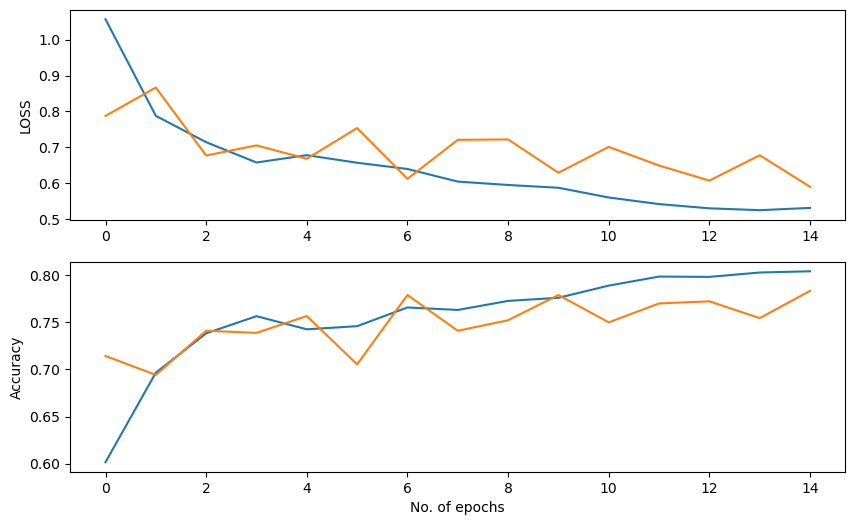

In [31]:
fig,axes = plt.subplots(2,1,figsize=(10,6))
axes[0].plot(df_loss[['loss','val_loss']])
axes[0].set_ylabel("LOSS")

axes[1].plot(df_loss[['accuracy','val_accuracy']])
axes[1].set_xlabel("No. of epochs")
axes[1].set_ylabel("Accuracy")

## **Using ResNet50 model for image recognition**

In [32]:
from tensorflow.keras.applications import ResNet50

# add preprocessing layer to the front of VGG
rsnet = ResNet50(input_shape=(150, 150, 3), weights='imagenet', include_top=False)
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# our layers - you can add more if you want
X = MaxPool2D()(rsnet.output)
X = Flatten()(X)
X = Dense(512, activation='relu')(X)

X = Dense(5, activation='softmax')(X)

# create a model object
model = Model(inputs=rsnet.input, outputs=X)

94765736/94765736 [==============================] - 0s 0us/step


In [33]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [35]:
# fit the model
model.fit(
  train_data,
  validation_data=validate_data,
  epochs=15,
  steps_per_epoch=len(train_data),
  validation_steps=len(validate_data)
)

Epoch 1/15
95/95 [==============================] - 61s 306ms/step - loss: 2.1041 - accuracy: 0.5767 - val_loss: 2.8004 - val_accuracy: 0.2453
Epoch 2/15
95/95 [==============================] - 28s 294ms/step - loss: 0.7259 - accuracy: 0.7314 - val_loss: 1.6265 - val_accuracy: 0.2442
Epoch 3/15
95/95 [==============================] - 27s 285ms/step - loss: 0.6905 - accuracy: 0.7549 - val_loss: 2.2824 - val_accuracy: 0.2442
Epoch 4/15
95/95 [==============================] - 28s 294ms/step - loss: 0.6146 - accuracy: 0.7718 - val_loss: 13.3289 - val_accuracy: 0.1767
Epoch 5/15
95/95 [==============================] - 28s 293ms/step - loss: 0.5639 - accuracy: 0.8003 - val_loss: 2.0338 - val_accuracy: 0.2442
Epoch 6/15
95/95 [==============================] - 28s 293ms/step - loss: 0.5439 - accuracy: 0.7999 - val_loss: 1.6308 - val_accuracy: 0.1907
Epoch 7/15
95/95 [==============================] - 28s 292ms/step - loss: 0.5284 - accuracy: 0.8129 - val_loss: 1.6066 - val_accuracy: 0.325

In [36]:
losses = model.history.history

Text(0, 0.5, 'Accuracy')

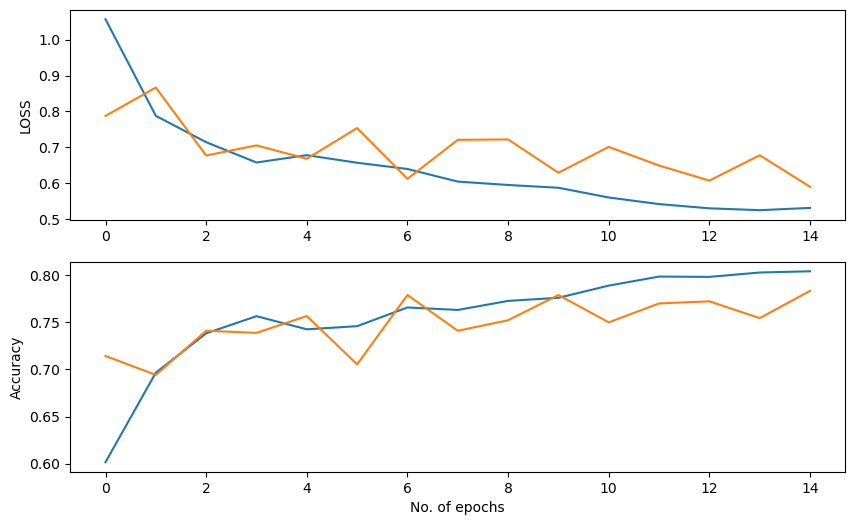

In [37]:
fig,axes = plt.subplots(2,1,figsize=(10,6))
axes[0].plot(df_loss[['loss','val_loss']])
axes[0].set_ylabel("LOSS")

axes[1].plot(df_loss[['accuracy','val_accuracy']])
axes[1].set_xlabel("No. of epochs")
axes[1].set_ylabel("Accuracy")